## (P) 명사 토큰화 (kiwipiepy)
일부 단체 및 고유명사 처리
위안부, 정신대, 성노예 분류

In [1]:
import pandas as pd
import hanja

file_path = r'D:\comfortwoman\comfortwoman.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# 한자 → 한글 변환 함수
def convert_hanja_to_hangul(cell):
    if isinstance(cell, str):
        return hanja.translate(cell, 'substitution')
    return cell

# 모든 셀에 변환 함수 적용
df_converted = df.applymap(convert_hanja_to_hangul)

# 덮어쓰기 저장
df_converted.to_excel(file_path, index=False)

print("한자 → 한글 변환 완료! 파일이 덮어쓰기 저장되었습니다.")


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19240\2957441877.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_converted = df.applymap(convert_hanja_to_hangul)


KeyboardInterrupt: 

In [3]:
import pandas as pd

# 파일 경로
file_path = r'D:\comfortwoman\comfortwoman.xlsx'

# 파일 읽기
df = pd.read_excel(file_path)

# 새로운 열을 0으로 초기화
df['Comfort'] = 0
df['Teishintai'] = 0
df['Slavery'] = 0

# '위안부'가 있으면 'Comfort'에 1
mask_comfort = df['Title'].astype(str).str.contains('위안부', na=False) | df['Token'].astype(str).str.contains('위안부', na=False)
df.loc[mask_comfort, 'Comfort'] = 1

# '정신대'가 있으면 'Teishintai'에 1
mask_teishintai = df['Title'].astype(str).str.contains('정신대', na=False) | df['Token'].astype(str).str.contains('정신대', na=False)
df.loc[mask_teishintai, 'Teishintai'] = 1

# '성노예'가 있으면 'Slavery'에 1
mask_slavery = df['Title'].astype(str).str.contains('성노예', na=False) | df['Token'].astype(str).str.contains('성노예', na=False)
df.loc[mask_slavery, 'Slavery'] = 1

# 결과 저장 (덮어쓰기)
df.to_excel(file_path, index=False)

print("Comfort, Teishintai, Slavery 열이 추가되어 저장되었습니다.")


Comfort, Teishintai, Slavery 열이 추가되어 저장되었습니다.


In [3]:
import pandas as pd

# 파일 경로 지정
file_path = r'D:\comfortwoman\comfortwoman.xlsx'

# 변환 사전 정의
replace_dict = {
    '화해·치유재단': '화해치유재단',
    '화해ㆍ치유재단': '화해치유재단',
    '화해 치유 재단': '화해치유재단',
    '여가부': '여성가족부',
    '한국 정신대 문제 대책 협의회': '한국정신대문제대책협의회',
    '정신대 문제 대책 협의회': '한국정신대문제대책협의회',
    '문제 대책 협의회': '한국정신대문제대책협의회',
    '대책 협의회': '한국정신대문제대책협의회',
    '정신대 대책 협의회': '한국정신대문제대책협의회',
    '정신대 협의회': '한국정신대문제대책협의회',
    '대책협의회': '한국정신대문제대책협의회',
    '문제대책협의회': '한국정신대문제대책협의회',
    '정신대문제대책협의회': '한국정신대문제대책협의회',
    '정신대대책협의회': '한국정신대문제대책협의회',
    '정신대협의회': '한국정신대문제대책협의회',
    '정대협': '한국정신대문제대책협의회',
    '정의 기억 재단': '정의기억재단',
    '정의 재단': '정의기억재단',
    '기억 재단': '정의기억재단',
    '일제 강제 동원 피해자 지원 재단': '일제강제동원피해자지원재단',
    '강제 동원 피해자 지원 재단': '일제강제동원피해자지원재단',
    '피해자 지원 재단': '일제강제동원피해자지원재단',
    '종군 위안부': '위안부',
    '종군위안부': '위안부',
    '위안부사죄결의안': '사죄결의안',
    '위안부 사죄 결의안': '사죄결의안',
    '사죄 결의안': '사죄결의안',
    '위안부 결의안': '사죄결의안',
    '한일 일본군 위안부 합의': '한일위안부합의',
    '한일일본군위안부합의': '한일위안부합의',
    '한일 위안부 합의': '한일위안부합의',
    '위안부 합의': '한일위안부합의',
    '미쓰비시중공업': '미쓰비시'

    
}

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# 변환 함수 정의
def replace_tokens(text, replace_dict):
    if pd.isnull(text):
        return text
    tokens = text.split()  # 띄어쓰기 단위로 분리
    replaced_tokens = [replace_dict.get(token, token) for token in tokens]
    return ' '.join(replaced_tokens)

# Contents 열에 변환 적용
df['Contents'] = df['Contents'].apply(lambda x: replace_tokens(x, replace_dict))

# 같은 파일명으로 저장
df.to_excel(file_path, index=False)


In [6]:
from kiwipiepy import Kiwi
import pandas as pd
import re
from collections import Counter

# Kiwi 설정 및 사용자 단어 추가
kiwi = Kiwi()

# 사용자 단어 추가
user_words = [
 
    ('한국정신대문제대책협의회', 'NNG', 5),
    ('정의기억재단', 'NNG', 5),
    ('일제강제동원피해자지원재단', 'NNG', 5),
    ('화해치유재단', 'NNG', 5),
    ('사죄결의안', 'NNG', 5),
    ('한일위안부합의', 'NNG', 5)

]

for word, tag, score in user_words:
    kiwi.add_user_word(word, tag, score)

#불용어 처리
stopwords = set([ 
                '기자','기타','대표','이날','입장','단체','의원','사실','상황','문제',
                '강조','가능','대사','장관','발언','정상','교수','결과','예정','중요',
                '의미','결정','확인','지역','추진','공개','관계자','논란','정도','마련',
                '조치','모습','대상','시대','위원장','시장','후보','위원','후보','운영',
                '회장','얘기','생활','사용','차원','행위','논의','표현','인식','주장',
                '생각','양국','요구','진행','공식','의견','재단','판단','행동','세력',
                '사회','시작','지적','공동','활동','자리','대응','계기','지난달','이번달',
                '태도','역할','현안','배우','후보자','사이','상대','마음','자료','개최',
                '주한','관리','질문','정보'
                

])

# 유의어 처리
replacement_dict = {
    '대한민국': '한국',
    '우리나라':'한국',
    '우리 나라':'한국',
    '녀자':'여성',
    '여자': '여성',
    '남자': '남성',
    '사람': '인간',
    '아이': '아동',
    '어린이': '아동',
    '노년': '노인',
    

 
}

# 특수문자 제거
def remove_special_characters(text):
    if not isinstance(text, str):  # 문자열 아닌 경우 처리
        return ''
    return re.sub(r'[^\x20-\x7E가-힣\s]', '', text)

# 숫자 제거
def remove_numbers(text):
    if not isinstance(text, str):  # 문자열 아닌 경우 처리
        return ''
    return re.sub(r'(?<!\d)(\d+년대)(?!\d)|\d+', lambda m: m.group(1) if m.group(1) else '', text)


def replace_words(text, replacement_dict):
    if not isinstance(text, str):  # 문자열 아닌 경우 처리
        return ''
    for old_word, new_word in replacement_dict.items():
        text = text.replace(old_word, new_word)
    return text

# 명사 추출 및 토큰화
def tokenize_with_kiwi(text):
    if not isinstance(text, str):  # 문자열 아닌 경우 처리
        return ''
    text = remove_special_characters(text)
    text = replace_words(text, replacement_dict)
    text = text.lower()
    text = remove_numbers(text)
    
    tokens = []
    for word, tag, start, length in kiwi.analyze(text, top_n=1)[0][0]:
        if tag in ['NNP', 'NNG'] and word not in stopwords and len(word) > 1:  # 불용어 제거 및 최소 길이 확인
            tokens.append(word)
    return ' '.join(tokens)

# 엑셀 파일 불러오기
file_path = 'D:\\comfortwoman\\comfortwoman.xlsx'
df = pd.read_excel(file_path)

# 적절한 열 이름 확인
text_column = 'Contents'
if text_column not in df.columns:
    raise ValueError(f"'{text_column}' 열이 데이터프레임에 존재하지 않습니다!")

# 데이터프레임 초기화
df['Token'] = ''

total_rows = len(df)
save_interval = 5000

output_file_path = 'D:\\comfortwoman\\comfortwoman_Token.xlsx'

# 진행 상황 안내 및 중간 저장을 위한 루프
for i in range(0, total_rows, save_interval):
    end_index = min(i + save_interval, total_rows)
    # 문자열로 변환하여 오류 방지
    df.loc[i:end_index-1, 'Token'] = df.loc[i:end_index-1, text_column] \
                                      .fillna('') \
                                      .astype(str) \
                                      .apply(tokenize_with_kiwi)

    print(f"{end_index}건 처리")  # 진행 상황 출력
    
    # 진행 상황 저장
    df[['Year', 'Month', 'Day', 'Publisher','Comfort','Teishintai','Slavery','Title','Token']].to_excel(output_file_path, index=False)

print("모든 행 처리 완료")

5000건 처리
10000건 처리
15000건 처리
20000건 처리
25000건 처리
30000건 처리
35000건 처리
40000건 처리
45000건 처리
50000건 처리
55000건 처리
60000건 처리
65000건 처리
70000건 처리
74579건 처리
모든 행 처리 완료


## (P) 빈도 및 TF-IDF

In [2]:
import pandas as pd
from collections import Counter
import os
from gensim.corpora import Dictionary
from gensim.models import TfidfModel

file_path = 'D:\\comfortwoman\\comfortwoman_Token.xlsx'
df = pd.read_excel(file_path)
output_path = os.path.join(os.path.dirname(file_path), 'comfortwoman_Freq.xlsx')

with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    # 1. 연도별 기사 수 및 그래프
    year_counts = df['Year'].value_counts().reset_index()
    year_counts.columns = ['Year', '기사 수']
    year_counts = year_counts.sort_values(by='Year', ascending=True)
    year_counts.to_excel(writer, sheet_name='연도별 기사 수', index=False)
    workbook = writer.book
    worksheet_year = writer.sheets['연도별 기사 수']
    chart_year = workbook.add_chart({'type': 'line'})
    chart_year.add_series({
        'name':       '기사 수',
        'categories': ['연도별 기사 수', 1, 0, len(year_counts), 0],
        'values':     ['연도별 기사 수', 1, 1, len(year_counts), 1],
        'marker':     {'type': 'circle', 'size': 7},
    })
    chart_year.set_title({'name': '연도별 기사 수'})
    chart_year.set_x_axis({'name': 'Year'})
    chart_year.set_y_axis({'name': '기사 수'})
    worksheet_year.insert_chart('D2', chart_year)

    # 2. 발행처 별 기사 수 및 원그래프
    publisher_counts = df['Publisher'].value_counts().reset_index()
    publisher_counts.columns = ['Publisher', '기사 수']
    publisher_counts = publisher_counts.sort_values(by='기사 수', ascending=False)
    publisher_counts.to_excel(writer, sheet_name='발행처 별 기사 수', index=False)
    worksheet_pub = writer.sheets['발행처 별 기사 수']
    chart_pub = workbook.add_chart({'type': 'pie'})
    chart_pub.add_series({
        'name': '발행처 별 기사 수',
        'categories': ['발행처 별 기사 수', 1, 0, len(publisher_counts), 0],
        'values': ['발행처 별 기사 수', 1, 1, len(publisher_counts), 1],
        'data_labels': {'percentage': True},
    })
    chart_pub.set_title({'name': '발행처 별 기사 수'})
    worksheet_pub.insert_chart('D2', chart_pub)

    # 2-1. 용어 별 기사 추이 시트 추가
    term_cols = ['Comfort', 'Teishintai', 'Slavery']
    term_yearly = df.groupby('Year')[term_cols].sum().astype(int).reset_index()
    total_row = ['합계'] + [term_yearly[col].sum() for col in term_cols]
    term_yearly_with_total = pd.concat([term_yearly, pd.DataFrame([total_row], columns=term_yearly.columns)], ignore_index=True)
    term_yearly_with_total.to_excel(writer, sheet_name='용어 별 기사 추이', index=False)
    worksheet_term = writer.sheets['용어 별 기사 추이']

    # 각각의 용어별로 꺾은선 그래프 생성 및 삽입
    chart_positions = ['F2', 'F18', 'F34']  # 그래프 위치 조정 필요시 수정
    for idx, col in enumerate(term_cols):
        chart = workbook.add_chart({'type': 'line'})
        chart.add_series({
            'name':       col,
            'categories': ['용어 별 기사 추이', 1, 0, len(term_yearly), 0],  # 연도
            'values':     ['용어 별 기사 추이', 1, idx+1, len(term_yearly), idx+1],  # 해당 용어 값
            'marker':     {'type': 'circle', 'size': 7},
        })
        chart.set_title({'name': f'{col} 연도별 기사 수'})
        chart.set_x_axis({'name': 'Year'})
        chart.set_y_axis({'name': '기사 수'})
        worksheet_term.insert_chart(chart_positions[idx], chart)

    # 3. 상위 200개 단어
    df['Token'] = df['Token'].fillna('').astype(str)
    tokens = df['Token'].str.cat(sep=' ').split()
    token_counts = Counter(tokens).most_common(200)
    def calculate_doc_count(token):
        return df['Token'].apply(lambda x: token in str(x)).sum()
    token_counts_with_docs = [(tk, freq, calculate_doc_count(tk)) for tk, freq in token_counts]
    texts = [doc.split() for doc in df['Token'].dropna()]
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    tfidf_model = TfidfModel(corpus)
    tfidf_scores = {dictionary[id]: score for doc in tfidf_model[corpus] for id, score in doc}
    token_df = pd.DataFrame(token_counts_with_docs, columns=['Token', 'Frequency', 'Doc Count'])
    token_df['TF-IDF'] = token_df['Token'].apply(lambda x: tfidf_scores.get(x, 0))
    token_df['Average Occurrences'] = token_df.apply(lambda row: row['Frequency'] / row['Doc Count'], axis=1)
    total_docs = df.shape[0]
    token_df['Doc Percentage'] = token_df['Doc Count'].apply(lambda x: round((x / total_docs) * 100, 2))
    token_df = token_df.head(200).sort_values(by='Frequency', ascending=False)
    token_df = token_df[['Token', 'Frequency', 'TF-IDF', 'Doc Count', 'Doc Percentage', 'Average Occurrences']]
    token_df.to_excel(writer, sheet_name='상위 200', index=False)

    # 4. 연도별 상위 100개 단어
    yearly_top_100_tokens = df.groupby('Year')['Token'].apply(lambda x: Counter(" ".join(x.dropna()).split()).most_common(100))
    year_total_docs = df.groupby('Year').size()
    data = []
    for year, tokens in yearly_top_100_tokens.items():
        row = [year]
        total_docs = year_total_docs.loc[year]
        for tk, freq in tokens:
            doc_count = df[(df['Year'] == year) & (df['Token'].str.contains(tk, na=False))].shape[0]
            row.append(f"{tk}({freq}, {doc_count}/{total_docs})")
        data.append(row)
    max_columns = max(len(row) for row in data)
    data = [row + [''] * (max_columns - len(row)) for row in data]
    columns = ['Year'] + [f'{i + 1}위' for i in range(max_columns - 1)]
    yearly_top_100_df = pd.DataFrame(data, columns=columns)
    yearly_top_100_df = yearly_top_100_df.sort_values(by='Year', ascending=True)
    yearly_top_100_df.to_excel(writer, sheet_name='연도별 상위 100개 단어', index=False)

print(f"파일이 저장되었습니다: {output_path}")


파일이 저장되었습니다: D:\comfortwoman\comfortwoman_Freq.xlsx


## (P) PKL 변환

검색어 제외: 위안부, 정신대, 성노예
문서의 55%이상에서 등장하는 단어: 일본, 한국, 정부

In [1]:
import pandas as pd
import pickle

# 데이터 로드
file_path = 'D:\\comfortwoman\\comfortwoman_Token.xlsx'
df = pd.read_excel(file_path)

# Token 열에서 일부 단어 제외하기
def filter_tokens(tokens):
    if isinstance(tokens, str):
        # 공백으로 구분된 문자열을 리스트로 변환
        token_list = tokens.split()

        # 예외 단어
        filtered_tokens = [token for token in token_list if token not in ['위안부','정신대','성노예','일본','한국','정부']]

        # 공백으로 구분된 문자열로 변환
        return ' '.join(filtered_tokens)
    return tokens

# Token 열 필터링 적용
if 'Token' in df.columns:
    df['Token'] = df['Token'].apply(filter_tokens)

# 파일을 pkl 형식으로 저장
pkl_file_path = 'D:\\comfortwoman\\comfortwoman_Token.pkl'
with open(pkl_file_path, 'wb') as f:
    pickle.dump(df, f)

print(f"데이터가 {pkl_file_path} 파일로 저장.")

# pkl 파일 로드하여 확인
with open(pkl_file_path, 'rb') as f:
    loaded_df = pickle.load(f)


데이터가 D:\comfortwoman\comfortwoman_Token.pkl 파일로 저장.


## (P) LDA와 DMR 토픽수 결정 작업

In [ ]:
import pandas as pd
import numpy as np
import tomotopy as tp
import pickle
import os

# =========================
# ==== 사용자 주요 설정 ====
# =========================

FOLDER_PATH = 'D:\\comfortwoman'
RESULT_SUBFOLDER = 'topic_selection_results'
LDA_SUBFOLDER = 'LDA'
DMR_SUBFOLDER = 'DMR'
PKL_FILE_NAME = 'comfortwoman_Token.pkl'
TOPIC_RANGE = range(8,31)
TRAIN_ITER = 1000
WORKERS = 1
RANDOM_SEED = 42
ALPHA = None
ETA = None

# =========================
# ==== 데이터 로드 및 전처리 ====
# =========================

folder_path = FOLDER_PATH
result_subfolder = os.path.join(folder_path, RESULT_SUBFOLDER)
lda_folder = os.path.join(result_subfolder, LDA_SUBFOLDER)
dmr_folder = os.path.join(result_subfolder, DMR_SUBFOLDER)
os.makedirs(lda_folder, exist_ok=True)
os.makedirs(dmr_folder, exist_ok=True)

pkl_file_path = os.path.join(folder_path, PKL_FILE_NAME)
with open(pkl_file_path, 'rb') as f:
    df = pickle.load(f)

def process_token(token):
    if isinstance(token, float):
        return str(token).split()
    return token.split()

processed_texts_Keyword = df['Token'].apply(process_token)
years = df['Year'].astype(str).tolist()
publishers = df['Publisher'].astype(str).tolist()
c_list = df['Comfort'].tolist()
t_list = df['Teishintai'].tolist()
s_list = df['Slavery'].tolist()

def get_cts_label(c, t, s):
    if c == 1 and t == 0 and s == 0:
        return 'C'
    elif c == 0 and t == 1 and s == 0:
        return 'T'
    elif c == 0 and t == 0 and s == 1:
        return 'S'
    elif c == 1 and t == 1 and s == 0:
        return 'C_T'
    elif c == 1 and t == 0 and s == 1:
        return 'C_S'
    elif c == 0 and t == 1 and s == 1:
        return 'T_S'
    elif c == 1 and t == 1 and s == 1:
        return 'C_T_S'
    else:
        return None

cts_labels = [get_cts_label(c, t, s) for c, t, s in zip(c_list, t_list, s_list)]

# =========================
# ==== Corpus 생성 및 저장 ====
# =========================

corpus = tp.utils.Corpus()
lda_token_list = []
for tokens, year, publisher, cts_label in zip(processed_texts_Keyword, years, publishers, cts_labels):
    if cts_label is None:
        continue
    corpus.add_doc(tokens, multi_metadata=[f'year_{year}', f'pub_{publisher}', f'cts_{cts_label}'])
    lda_token_list.append(tokens)

corpus_file = os.path.join(result_subfolder, 'comfortwoman_tomotopy_corpus_multi.pkl')
with open(corpus_file, 'wb') as f:
    pickle.dump(corpus, f)
print(f"Corpus with multi-metadata saved at {corpus_file}")

# =========================
# ==== 사용자 입력: 모델 선택 ====
# =========================

while True:
    print("\n토픽 모델 계산 방식을 선택하세요:")
    print("1: LDA만 계산")
    print("2: DMR만 계산")
    print("3: LDA와 DMR 모두 계산")
    model_choice = input("입력 (1/2/3): ").strip()
    if model_choice in ('1', '2', '3'):
        break
    print("잘못된 입력입니다. 1, 2, 3 중 하나를 입력하세요.")

from tomotopy.coherence import Coherence

topic_range = TOPIC_RANGE
coherence_values_lda = []
coherence_values_dmr = []
perplexity_values_lda = []
perplexity_values_dmr = []
dmr_meta_topic_dist_by_k = {}

for num_topics in topic_range:
    if model_choice in ('1', '3'):
        lda_kwargs = dict(k=num_topics, seed=RANDOM_SEED)
        if ALPHA is not None:
            lda_kwargs['alpha'] = ALPHA
        if ETA is not None:
            lda_kwargs['eta'] = ETA
        lda_model = tp.LDAModel(**lda_kwargs)
        for tokens in lda_token_list:
            lda_model.add_doc(tokens)
        lda_model.train(TRAIN_ITER, workers=WORKERS, show_progress=False)
        coh_lda = Coherence(lda_model, coherence='c_v')
        coherence_values_lda.append(coh_lda.get_score())
        perplexity_values_lda.append(lda_model.perplexity)
        lda_model.save(os.path.join(lda_folder, f'lda_k{num_topics}.bin'))
        print(f'[LDA] Number of Topics: {num_topics}, Perplexity: {perplexity_values_lda[-1]}, Coherence: {coherence_values_lda[-1]}')

    if model_choice in ('2', '3'):
        dmr_kwargs = dict(k=num_topics, seed=RANDOM_SEED)
        if ALPHA is not None:
            dmr_kwargs['alpha'] = ALPHA
        if ETA is not None:
            dmr_kwargs['eta'] = ETA
        dmr_model = tp.DMRModel(**dmr_kwargs)
        dmr_model.add_corpus(corpus)
        dmr_model.train(TRAIN_ITER, workers=WORKERS, show_progress=False)
        coh_dmr = Coherence(dmr_model, coherence='c_v')
        coherence_values_dmr.append(coh_dmr.get_score())
        perplexity_values_dmr.append(dmr_model.perplexity)
        dmr_model.save(os.path.join(dmr_folder, f'dmr_k{num_topics}.bin'))
        print(f'[DMR] Number of Topics: {num_topics}, Perplexity: {perplexity_values_dmr[-1]}, Coherence: {coherence_values_dmr[-1]}')

        year_list = sorted(set(years))
        publisher_list = sorted(set(publishers))
        cts_label_list = sorted(set([label for label in cts_labels if label is not None]))
        meta_topic_dist = {}
        for year in year_list:
            for publisher in publisher_list:
                for cts_label in cts_label_list:
                    meta = [f'year_{year}', f'pub_{publisher}', f'cts_{cts_label}']
                    meta_topic_dist[(year, publisher, cts_label)] = dmr_model.get_topic_prior(multi_metadata=meta)
        dmr_meta_topic_dist_by_k[num_topics] = {
            'meta_keys': list(meta_topic_dist.keys()),
            'topic_distribution': np.array(list(meta_topic_dist.values()))
        }

# =========================
# ==== 결과 누적 저장 ====
# =========================

results_file = os.path.join(result_subfolder, 'comfortwoman_Coherence_tomotopy_multi.pkl')

if os.path.exists(results_file):
    with open(results_file, 'rb') as f:
        results = pickle.load(f)
else:
    results = {
        'topic_range': [],
        'coherence_values_lda': [],
        'coherence_values_dmr': [],
        'perplexity_values_lda': [],
        'perplexity_values_dmr': []
    }

for idx, k in enumerate(topic_range):
    if k not in results['topic_range']:
        results['topic_range'].append(k)
        results['coherence_values_lda'].append(coherence_values_lda[idx])
        results['coherence_values_dmr'].append(coherence_values_dmr[idx])
        results['perplexity_values_lda'].append(perplexity_values_lda[idx])
        results['perplexity_values_dmr'].append(perplexity_values_dmr[idx])
    else:
        exist_idx = results['topic_range'].index(k)
        results['coherence_values_lda'][exist_idx] = coherence_values_lda[idx]
        results['coherence_values_dmr'][exist_idx] = coherence_values_dmr[idx]
        results['perplexity_values_lda'][exist_idx] = perplexity_values_lda[idx]
        results['perplexity_values_dmr'][exist_idx] = perplexity_values_dmr[idx]

sorted_indices = sorted(range(len(results['topic_range'])), key=lambda i: results['topic_range'][i])
results['topic_range'] = [results['topic_range'][i] for i in sorted_indices]
results['coherence_values_lda'] = [results['coherence_values_lda'][i] for i in sorted_indices]
results['coherence_values_dmr'] = [results['coherence_values_dmr'][i] for i in sorted_indices]
results['perplexity_values_lda'] = [results['perplexity_values_lda'][i] for i in sorted_indices]
results['perplexity_values_dmr'] = [results['perplexity_values_dmr'][i] for i in sorted_indices]

with open(results_file, 'wb') as f:
    pickle.dump(results, f)
print(f"누적된 결과가 {results_file}에 저장되었습니다.")

if model_choice in ('2', '3'):
    meta_topic_dist_file = os.path.join(dmr_folder, 'meta_topic_distribution.pkl')
    with open(meta_topic_dist_file, 'wb') as f:
        pickle.dump(dmr_meta_topic_dist_by_k, f)
    print(f"DMR 메타데이터별 토픽 분포가 {meta_topic_dist_file}에 저장되었습니다.")


Corpus with multi-metadata saved at D:\comfortwoman\topic_selection_results\comfortwoman_tomotopy_corpus_multi.pkl

토픽 모델 계산 방식을 선택하세요:
1: LDA만 계산
2: DMR만 계산
3: LDA와 DMR 모두 계산


In [1]:
import pickle
import matplotlib.pyplot as plt
import os

# =========================
# ==== 경로 설정 ====
# =========================

FOLDER_PATH = 'D:\\comfortwoman'
RESULT_SUBFOLDER = 'topic_selection_results'
LDA_SUBFOLDER = 'LDA'
DMR_SUBFOLDER = 'DMR'

result_subfolder = os.path.join(FOLDER_PATH, RESULT_SUBFOLDER)
lda_folder = os.path.join(result_subfolder, LDA_SUBFOLDER)
dmr_folder = os.path.join(result_subfolder, DMR_SUBFOLDER)
results_file = os.path.join(result_subfolder, 'comfortwoman_Coherence_tomotopy_multi.pkl')

# =========================
# ==== 결과 파일 불러오기 ====
# =========================

with open(results_file, 'rb') as f:
    results = pickle.load(f)

topic_range = results['topic_range']
coherence_values_lda = results['coherence_values_lda']
coherence_values_dmr = results['coherence_values_dmr']
perplexity_values_lda = results['perplexity_values_lda']
perplexity_values_dmr = results['perplexity_values_dmr']

# =========================
# ==== LDA 그래프 ====
# =========================

if any(perplexity_values_lda):
    plt.figure(figsize=(9, 4))
    ax1 = plt.gca()
    color = 'tab:blue'
    ax1.set_xlabel('Number of Topics')
    ax1.set_ylabel('Perplexity', color=color)
    ax1.plot(topic_range, perplexity_values_lda, marker='o', color=color, label='LDA Perplexity')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticks(list(topic_range))

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Coherence', color=color)
    ax2.plot(topic_range, coherence_values_lda, marker='o', color=color, label='LDA Coherence')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('LDA: Perplexity and Coherence Scores by Number of Topics')
    plt.tight_layout()
    plt.savefig(os.path.join(lda_folder, 'lda_perplexity_coherence.png'))
    plt.show()

# =========================
# ==== DMR 그래프 ====
# =========================

if any(perplexity_values_dmr):
    plt.figure(figsize=(9, 4))
    ax1 = plt.gca()
    color = 'tab:blue'
    ax1.set_xlabel('Number of Topics')
    ax1.set_ylabel('Perplexity', color=color)
    ax1.plot(topic_range, perplexity_values_dmr, marker='o', color=color, label='DMR Perplexity')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticks(list(topic_range))

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Coherence', color=color)
    ax2.plot(topic_range, coherence_values_dmr, marker='o', color=color, label='DMR Coherence')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('DMR: Perplexity and Coherence Scores by Number of Topics')
    plt.tight_layout()
    plt.savefig(os.path.join(dmr_folder, 'dmr_perplexity_coherence_multi.png'))
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\comfortwoman\\topic_selection_results\\comfortwoman_Coherence_tomotopy_multi.pkl'

## (P) LDA, DMR 토픽모델링 결과



In [13]:
import pandas as pd
import tomotopy as tp
import os
import pickle
import numpy as np

# =========================
# ===== 사용자 주요 설정 ====
# =========================

FOLDER_PATH = 'D:\\comfortwoman'
RESULT_SUBFOLDER = 'topic_selection_results'
LDA_SUBFOLDER = 'LDA'
DMR_SUBFOLDER = 'DMR'
PKL_FILE_NAME = 'comfortwoman_Token.pkl'
CORPUS_FILE = os.path.join(FOLDER_PATH, RESULT_SUBFOLDER, 'comfortwoman_tomotopy_corpus_multi.pkl')

RANDOM_SEED = 42
WORKERS = 3
ALPHA = None
ETA = None
SAVE_EXCEL = True

# =========================
# ===== 이하 진행 코드 ======
# =========================

corpus_file = CORPUS_FILE

# 원본 데이터프레임 로드 (기사 정보 포함)
pkl_file_path = os.path.join(FOLDER_PATH, PKL_FILE_NAME)
with open(pkl_file_path, 'rb') as f:
    df = pickle.load(f)

# CTS_Label 생성 함수
def get_cts_label(c, t, s):
    if c == 1 and t == 0 and s == 0:
        return 'C'
    elif c == 0 and t == 1 and s == 0:
        return 'T'
    elif c == 0 and t == 0 and s == 1:
        return 'S'
    elif c == 1 and t == 1 and s == 0:
        return 'C_T'
    elif c == 1 and t == 0 and s == 1:
        return 'C_S'
    elif c == 0 and t == 1 and s == 1:
        return 'T_S'
    elif c == 1 and t == 1 and s == 1:
        return 'C_T_S'
    else:
        return None

if 'CTS_Label' not in df.columns:
    df['CTS_Label'] = [get_cts_label(c, t, s) for c, t, s in zip(df['Comfort'], df['Teishintai'], df['Slavery'])]

with open(corpus_file, 'rb') as f:
    corpus = pickle.load(f)

years = []
publishers = []
cts_labels = []
data = df.to_dict('records')
for row in data:
    year = row['Year']
    publisher = row['Publisher']
    cts_label = row['CTS_Label']
    tokens = row['Token']
    years.append(year)
    publishers.append(publisher)
    cts_labels.append(cts_label)

def get_top_articles_by_topic(model, df, top_n=20):
    topic_distributions = np.array([doc.get_topic_dist() for doc in model.docs])
    top_articles = {}
    for topic_idx in range(model.k):
        sorted_indices = np.argsort(topic_distributions[:, topic_idx])[::-1][:top_n]
        df_top = df.iloc[sorted_indices].copy()
        df_top['Topic_Contribution'] = topic_distributions[sorted_indices, topic_idx]
        ordered_cols = [
            'Year', 'Month', 'Day', 'Publisher', 'Topic_Contribution',
            'Title', 'Comfort', 'Teishintai', 'Slavery'
        ]
        rest_cols = [col for col in df_top.columns if col not in ordered_cols]
        df_top = df_top[ordered_cols + rest_cols]
        top_articles[topic_idx + 1] = df_top
    return top_articles

print("LDA용 토픽 수를 한 개씩 입력하세요. (엔터만 입력하면 DMR로 넘어감)")
lda_topic_numbers = []
while True:
    user_input = input("LDA 토픽 수 입력 (완료하려면 Enter): ")
    if not user_input:
        break
    try:
        num = int(user_input)
        if num <= 0:
            print("양수를 입력해주세요.")
            continue
        lda_topic_numbers.append(num)
        print(f"LDA 토픽 수 {num}이(가) 추가되었습니다.")
    except ValueError:
        print("유효한 숫자를 입력해주세요.")

print("\nDMR용 토픽 수를 한 개씩 입력하세요. (엔터만 입력하면 입력 종료)")
dmr_topic_numbers = []
while True:
    user_input = input("DMR 토픽 수 입력 (완료하려면 Enter): ")
    if not user_input:
        break
    try:
        num = int(user_input)
        if num <= 0:
            print("양수를 입력해주세요.")
            continue
        dmr_topic_numbers.append(num)
        print(f"DMR 토픽 수 {num}이(가) 추가되었습니다.")
    except ValueError:
        print("유효한 숫자를 입력해주세요.")

if not lda_topic_numbers and not dmr_topic_numbers:
    print("입력된 토픽 수가 없습니다. 프로그램을 종료합니다.")
    exit()

while True:
    try:
        train_iter = int(input("\n학습 반복 횟수를 입력하세요 (기본값 1000): ") or "1000")
        if train_iter <= 0:
            print("양수를 입력해주세요.")
            continue
        break
    except ValueError:
        print("유효한 숫자를 입력해주세요.")

# =========================
# ===== LDA 처리 (파일 체크) =====
# =========================

for num_topics in lda_topic_numbers:
    # 모델(bin) 파일 경로: D:\comfortwoman\topic_selection_results\LDA\lda_k{num_topics}_final.bin
    lda_folder = os.path.join(FOLDER_PATH, RESULT_SUBFOLDER, LDA_SUBFOLDER)
    os.makedirs(lda_folder, exist_ok=True)
    model_file = os.path.join(lda_folder, f'lda_k{num_topics}.bin')
    if os.path.exists(model_file):
        print(f"[LDA] 토픽 수 {num_topics}: 기존 모델 파일이 존재합니다. 불러옵니다.")
        lda_model = tp.LDAModel.load(model_file)
    else:
        print(f"[LDA] 토픽 수 {num_topics}: 모델 파일이 없어 새로 학습합니다.")
        lda_kwargs = dict(k=num_topics, seed=RANDOM_SEED)
        if ALPHA is not None:
            lda_kwargs['alpha'] = ALPHA
        if ETA is not None:
            lda_kwargs['eta'] = ETA
        lda_model = tp.LDAModel(**lda_kwargs)
        lda_model.add_corpus(corpus)
        lda_model.train(train_iter, workers=WORKERS, show_progress=True)
        lda_model.save(model_file)
        print(f"LDA 모델이 {model_file}에 저장되었습니다.")

    # 엑셀 결과는 D:\comfortwoman\LDA_{num_topics}\ 에 저장
    lda_excel_folder = os.path.join(FOLDER_PATH, f'LDA_{num_topics}')
    os.makedirs(lda_excel_folder, exist_ok=True)

    data = []
    for k in range(lda_model.k):
        topic_words = lda_model.get_topic_words(k, top_n=10)
        keywords = [word for word, prob in topic_words]
        contributions = [prob for word, prob in topic_words]
        data.append([f"Topic {k+1}"] + keywords)
        data.append([f"Topic {k+1} Contributions"] + contributions)
        print(f"LDA Topic {k+1}: {', '.join([f'{w}({p:.4f})' for w, p in topic_words])}")

    output_file = os.path.join(lda_excel_folder, f'LDA_{num_topics}_topics.xlsx')
    if SAVE_EXCEL:
        df_result = pd.DataFrame(data)
        with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
            df_result.to_excel(writer, sheet_name='LDA', index=False, header=False)
        print(f"LDA 결과가 {output_file}에 저장되었습니다.")

    topic_distributions = [doc.get_topic_dist() for doc in lda_model.docs]
    topic_distributions = np.array(topic_distributions)
    topic_proportions = topic_distributions.mean(axis=0)
    percent_values = np.round(topic_proportions * 100, 2)
    df_topic_num = pd.DataFrame({
        'Topic': [f'Topic {i+1}' for i in range(lda_model.k)],
        'Proportion': topic_proportions,
        'Percent': percent_values
    })
    df_proportion_sorted = df_topic_num.sort_values(by='Proportion', ascending=False).reset_index(drop=True)
    dist_file = os.path.join(lda_excel_folder, f'LDA_{num_topics}_distribution.xlsx')
    with pd.ExcelWriter(dist_file) as writer:
        df_topic_num.to_excel(writer, sheet_name='By_Topic_Number', index=False)
        df_proportion_sorted.to_excel(writer, sheet_name='By_Proportion', index=False)
    print(f"LDA 전체 토픽별 비중이 {dist_file} 파일에 저장되었습니다.")

    lda_top20 = get_top_articles_by_topic(lda_model, df, top_n=20)
    lda_top20_file = os.path.join(lda_excel_folder, f'LDA_{num_topics}_top20_articles_by_topic.xlsx')
    if SAVE_EXCEL:
        with pd.ExcelWriter(lda_top20_file, engine='xlsxwriter') as writer:
            for topic_num, df_topic in lda_top20.items():
                df_topic.to_excel(writer, sheet_name=f'Topic_{topic_num}', index=False)
        print(f"LDA 토픽별 상위 20개 기사 엑셀 저장 완료: {lda_top20_file}")

# =========================
# ===== DMR 처리 (파일 체크) =====
# =========================

for num_topics in dmr_topic_numbers:
    # 모델(bin) 파일 경로: D:\comfortwoman\topic_selection_results\DMR\dmr_k{num_topics}.bin
    dmr_folder = os.path.join(FOLDER_PATH, RESULT_SUBFOLDER, DMR_SUBFOLDER)
    os.makedirs(dmr_folder, exist_ok=True)
    dmr_model_file = os.path.join(dmr_folder, f'dmr_k{num_topics}.bin')
    if os.path.exists(dmr_model_file):
        print(f"[DMR] 토픽 수 {num_topics}: 기존 모델 파일이 존재합니다. 불러옵니다.")
        dmr_model = tp.DMRModel.load(dmr_model_file)
    else:
        print(f"[DMR] 토픽 수 {num_topics}: 모델 파일이 없어 새로 학습합니다.")
        dmr_kwargs = dict(k=num_topics, seed=RANDOM_SEED)
        if ALPHA is not None:
            dmr_kwargs['alpha'] = ALPHA
        if ETA is not None:
            dmr_kwargs['eta'] = ETA
        dmr_model = tp.DMRModel(**dmr_kwargs)
        dmr_model.add_corpus(corpus)
        dmr_model.train(train_iter, workers=WORKERS, show_progress=True)
        dmr_model.save(dmr_model_file)
        print(f"DMR 모델이 {dmr_model_file}에 저장되었습니다.")

    # 엑셀 결과는 D:\comfortwoman\DMR_{num_topics}\ 에 저장
    dmr_excel_folder = os.path.join(FOLDER_PATH, f'DMR_{num_topics}')
    os.makedirs(dmr_excel_folder, exist_ok=True)

    data = []
    for k in range(dmr_model.k):
        topic_words = dmr_model.get_topic_words(k, top_n=10)
        keywords = [word for word, prob in topic_words]
        contributions = [prob for word, prob in topic_words]
        data.append([f"Topic {k+1}"] + keywords)
        data.append([f"Topic {k+1} Contributions"] + contributions)
        print(f"DMR Topic {k+1}: {', '.join([f'{w}({p:.4f})' for w, p in topic_words])}")

    output_file = os.path.join(dmr_excel_folder, f'DMR_{num_topics}_topics.xlsx')
    if SAVE_EXCEL:
        df_result = pd.DataFrame(data)
        with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
            df_result.to_excel(writer, sheet_name='DMR', index=False, header=False)
        print(f"DMR 결과가 {output_file}에 저장되었습니다.")

    year_list = sorted(set(years))
    publisher_list = sorted(set(publishers))
    cts_label_list = sorted(set(cts_labels))

    meta_topic_data = []
    for year in year_list:
        for publisher in publisher_list:
            for cts_label in cts_label_list:
                meta = [f'year_{year}', f'pub_{publisher}', f'cts_{cts_label}']
                topic_prior = dmr_model.get_topic_prior(multi_metadata=meta)
                meta_topic_data.append([year, publisher, cts_label] + list(topic_prior))

    df_meta_topic = pd.DataFrame(
        meta_topic_data,
        columns=['Year', 'Publisher', 'CTS_Label'] + [f'Topic {i+1}' for i in range(dmr_model.k)]
    )
    meta_topic_file = os.path.join(dmr_excel_folder, f'DMR_{num_topics}_meta_distribution.xlsx')
    if SAVE_EXCEL:
        df_meta_topic.to_excel(meta_topic_file, index=False)
        print(f"연도-신문사-CTS조합별 토픽 분포 저장됨: {meta_topic_file}")

    topic_distributions = [doc.get_topic_dist() for doc in dmr_model.docs]
    topic_distributions = np.array(topic_distributions)
    topic_proportions = topic_distributions.mean(axis=0)
    percent_values = np.round(topic_proportions * 100, 2)
    df_topic_num = pd.DataFrame({
        'Topic': [f'Topic {i+1}' for i in range(dmr_model.k)],
        'Proportion': topic_proportions,
        'Percent': percent_values
    })
    df_proportion_sorted = df_topic_num.sort_values(by='Proportion', ascending=False).reset_index(drop=True)
    dist_file = os.path.join(dmr_excel_folder, f'DMR_{num_topics}_distribution.xlsx')
    with pd.ExcelWriter(dist_file) as writer:
        df_topic_num.to_excel(writer, sheet_name='By_Topic_Number', index=False)
        df_proportion_sorted.to_excel(writer, sheet_name='By_Proportion', index=False)
    print(f"DMR 전체 토픽별 비중이 {dist_file} 파일에 저장되었습니다.")

    dmr_top20 = get_top_articles_by_topic(dmr_model, df, top_n=20)
    dmr_top20_file = os.path.join(dmr_excel_folder, f'DMR_{num_topics}_doc.xlsx')
    if SAVE_EXCEL:
        with pd.ExcelWriter(dmr_top20_file, engine='xlsxwriter') as writer:
            for topic_num, df_topic in dmr_top20.items():
                df_topic.to_excel(writer, sheet_name=f'Topic_{topic_num}', index=False)
        print(f"DMR 토픽별 상위 20개 기사 엑셀 저장 완료: {dmr_top20_file}")

    # ====== 연도별 토픽 비중 파일 생성 및 저장 ======
    topic_cols = [col for col in df_meta_topic.columns if col.startswith('Topic ')]
    df_year_topic = df_meta_topic.groupby('Year')[topic_cols].mean().reset_index()
    year_topic_file = os.path.join(dmr_excel_folder, f'DMR_{num_topics}_year_distribution.xlsx')
    df_year_topic.to_excel(year_topic_file, index=False)
    print(f"연도별 토픽 비중 파일 저장: {year_topic_file}")

print("\n모든 작업이 완료되었습니다!")


LDA용 토픽 수를 한 개씩 입력하세요. (엔터만 입력하면 DMR로 넘어감)
LDA 토픽 수 8이(가) 추가되었습니다.
LDA 토픽 수 9이(가) 추가되었습니다.
LDA 토픽 수 10이(가) 추가되었습니다.

DMR용 토픽 수를 한 개씩 입력하세요. (엔터만 입력하면 입력 종료)
DMR 토픽 수 8이(가) 추가되었습니다.
DMR 토픽 수 9이(가) 추가되었습니다.
DMR 토픽 수 10이(가) 추가되었습니다.
[LDA] 토픽 수 8: 기존 모델 파일이 존재합니다. 불러옵니다.
LDA Topic 1: 할머니(0.0094), 피해자(0.0077), 대통령(0.0075), 역사(0.0068), 일본군(0.0062), 여성(0.0061), 총리(0.0057), 미국(0.0055), 외교(0.0054), 아베(0.0047)
LDA Topic 2: 할머니(0.0095), 피해자(0.0077), 대통령(0.0075), 역사(0.0068), 일본군(0.0061), 총리(0.0061), 여성(0.0058), 외교(0.0055), 미국(0.0054), 아베(0.0049)
LDA Topic 3: 할머니(0.0096), 대통령(0.0077), 피해자(0.0075), 역사(0.0070), 일본군(0.0064), 여성(0.0059), 총리(0.0057), 미국(0.0054), 외교(0.0053), 아베(0.0050)
LDA Topic 4: 할머니(0.0096), 피해자(0.0079), 대통령(0.0074), 역사(0.0067), 일본군(0.0064), 총리(0.0060), 여성(0.0059), 외교(0.0056), 미국(0.0053), 아베(0.0050)
LDA Topic 5: 할머니(0.0098), 피해자(0.0077), 대통령(0.0073), 역사(0.0067), 일본군(0.0063), 여성(0.0058), 총리(0.0058), 외교(0.0057), 미국(0.0052), 아베(0.0050)
LDA Topic 6: 할머니(0.0096), 피해자(0.0080), 대통령(0.0073), 

## (P) DMR 시각화


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import font_manager, rc

# Windows 나눔 고딕
font_path = "C:/Windows/Fonts/NanumGothic.ttf"  
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 음수 깨짐 방지 (필수)
plt.rcParams['axes.unicode_minus'] = False




# ===== 사용자 입력 =====
main_folder = 'D:\\comfortwoman'
print("DMR 토픽 수를 입력하세요:")
dmr_k = int(input("토픽 수: "))

dmr_folder = os.path.join(main_folder, f'DMR_{dmr_k}')
year_topic_file = os.path.join(dmr_folder, f'DMR_{dmr_k}_year_distribution.xlsx')

if not os.path.exists(year_topic_file):
    print(f"{year_topic_file} 파일이 존재하지 않습니다.")
    exit()

# 시간 단위 입력
group_size = int(input("시간 단위(예: 1=1년, 10=10년): "))

# ===== 데이터 로드 =====
df_year_topic = pd.read_excel(year_topic_file)
years = df_year_topic['Year'].astype(int).tolist()
topic_matrix = df_year_topic.drop('Year', axis=1).values # shape: (연도수, 토픽수)
num_topics = topic_matrix.shape[1]

# ===== 그룹핑 함수 =====
def group_years(years, group_size):
    grouped = {}
    for y in years:
        start = (y // group_size) * group_size
        group_label = f'{start}s'
        if group_label not in grouped:
            grouped[group_label] = []
        grouped[group_label].append(y)
    return grouped

grouped_years = group_years(years, group_size)

# 그룹별 평균 토픽 분포 계산 (정규화 포함)
group_labels = []
group_years_centers = []
group_topic_matrix = []
for group_label, year_list in grouped_years.items():
    idxs = [years.index(y) for y in year_list]
    group_vectors = topic_matrix[idxs, :]
    group_mean = np.mean(group_vectors, axis=0)
    group_mean = group_mean / group_mean.sum()  # 정규화: 합이 1
    group_labels.append(group_label)
    center_year = int(np.mean([int(y) for y in year_list]))
    group_years_centers.append(center_year)
    group_topic_matrix.append(group_mean)
group_topic_matrix = np.array(group_topic_matrix) # shape: (그룹수, 토픽수)

# ===== 그래프 출력 및 저장 =====
for k in range(num_topics):
    y_values = group_topic_matrix[:, k] * 100 # %로 변환
    y_max = np.ceil(y_values.max() / 10) * 10 # 10단위 올림
    topic_num_str = f"{k+1:02d}"

    plt.figure(figsize=(8, 5))
    plt.plot(group_labels, y_values, marker='o', color='tab:blue')
    plt.title(f"Topic {k+1}")
    plt.xlabel(f"Time (단위: {group_size}년)")
    plt.ylabel("Topic Proportion (%)")
    plt.ylim(0, y_max)

    # ----- x축: 10년 단위 라벨만 표기 -----
    x_ticks_10y = [lbl for lbl in group_labels if int(lbl.rstrip('s')) % 10 == 0]
    x_ticks_pos = [i for i, lbl in enumerate(group_labels) if int(lbl.rstrip('s')) % 10 == 0]
    plt.xticks(x_ticks_pos, x_ticks_10y)

    # ----- y축: 최대값이 45 이하이면 5단위, 그 이상이면 10단위 -----
    if y_max <= 45:
        plt.yticks(np.arange(0, y_max + 1, 5))  # 0, 5, 10, ...
    else:
        plt.yticks(np.arange(0, y_max + 1, 10))  # 0, 10, 20, ...

    plt.grid(True, axis='y')

    # y값이 최대인 부분에 연도 표기
    max_idx = np.argmax(y_values)
    max_x = group_labels[max_idx]
    max_y = y_values[max_idx]
    max_year = group_years_centers[max_idx]
    plt.annotate(f"{max_year}", xy=(max_x, max_y),
                 xytext=(0, 10), textcoords='offset points',
                 ha='center', va='bottom', fontsize=10, color='red',
                 bbox=dict(boxstyle="round,pad=0.2", fc="yellow", alpha=0.5))

    file_name = f"Topic{topic_num_str}_{group_size}y_{int(y_max)}.png"
    out_file = os.path.join(dmr_folder, file_name)
    plt.tight_layout()
    plt.savefig(out_file)
    plt.close()
    print(f"그래프 저장: {out_file}")

print("\n모든 토픽별 시간 추이 그래프가 저장되었습니다.")


DMR 토픽 수를 입력하세요:
그래프 저장: D:\comfortwoman\DMR_10\Topic01_1y_10.png
그래프 저장: D:\comfortwoman\DMR_10\Topic02_1y_10.png
그래프 저장: D:\comfortwoman\DMR_10\Topic03_1y_10.png
그래프 저장: D:\comfortwoman\DMR_10\Topic04_1y_10.png
그래프 저장: D:\comfortwoman\DMR_10\Topic05_1y_10.png
그래프 저장: D:\comfortwoman\DMR_10\Topic06_1y_10.png
그래프 저장: D:\comfortwoman\DMR_10\Topic07_1y_10.png
그래프 저장: D:\comfortwoman\DMR_10\Topic08_1y_10.png
그래프 저장: D:\comfortwoman\DMR_10\Topic09_1y_10.png
그래프 저장: D:\comfortwoman\DMR_10\Topic10_1y_10.png

모든 토픽별 시간 추이 그래프가 저장되었습니다.


## 언론사별

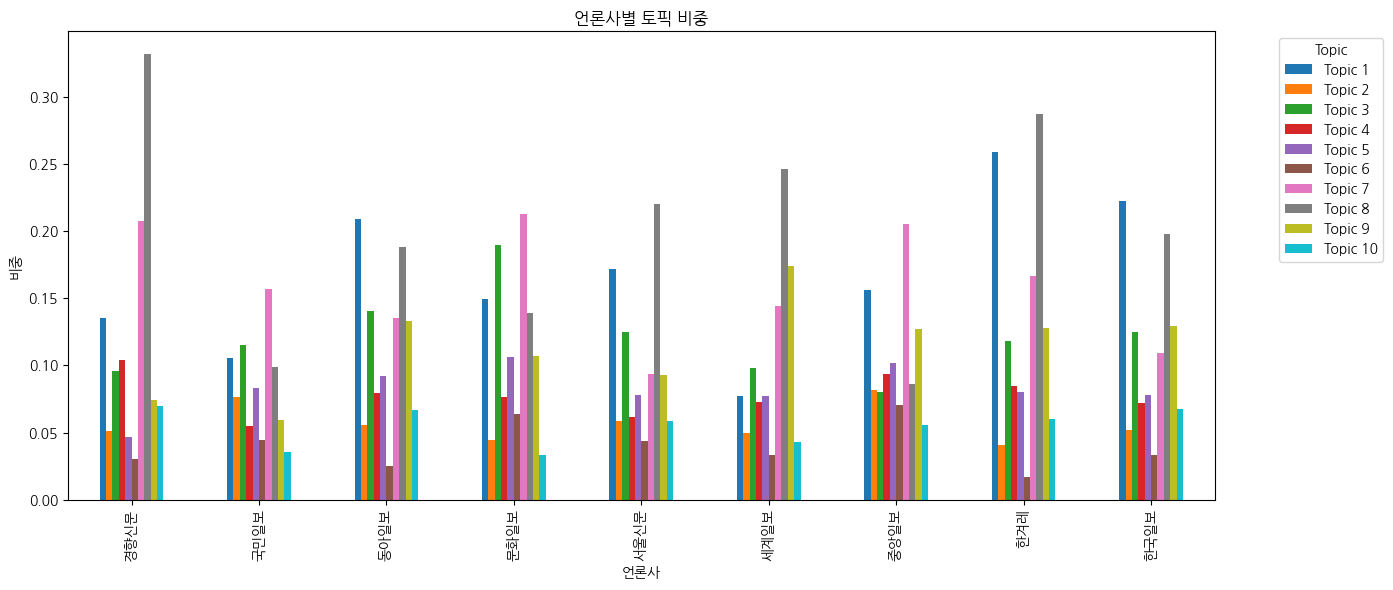

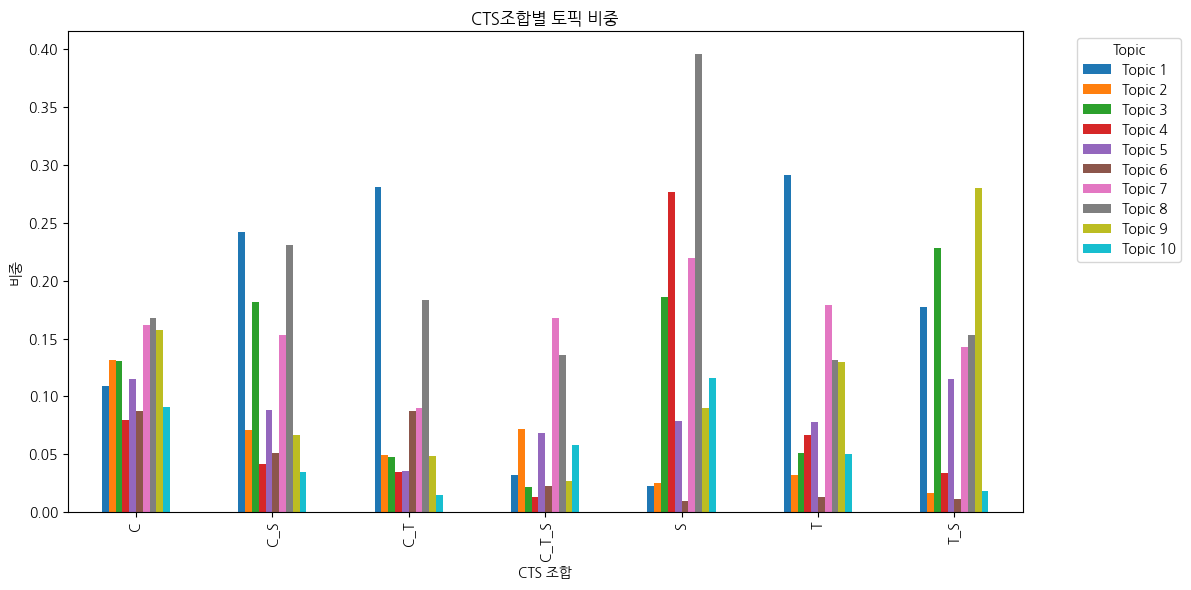

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 경로 및 파일명 설정
FOLDER_PATH = 'D:\\comfortwoman'
num_topics = 10  # 원하는 토픽 수로 변경
dmr_folder = os.path.join(FOLDER_PATH, f'DMR_{num_topics}')
meta_topic_file = os.path.join(dmr_folder, f'DMR_{num_topics}_meta_distribution.xlsx')

# 데이터 로드
df_meta = pd.read_excel(meta_topic_file)

# 토픽 컬럼 목록 추출
topic_cols = [col for col in df_meta.columns if col.startswith('Topic ')]

# 1. 언론사(Publisher)별 토픽 비중 (전체 평균)
publisher_group = df_meta.groupby('Publisher')[topic_cols].mean()

publisher_group.plot(kind='bar', figsize=(14,6))
plt.title('언론사별 토픽 비중')
plt.ylabel('비중')
plt.xlabel('언론사')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. CTS조합별 토픽 비중 (전체 평균)
cts_group = df_meta.groupby('CTS_Label')[topic_cols].mean()

cts_group.plot(kind='bar', figsize=(12,6))
plt.title('CTS조합별 토픽 비중')
plt.ylabel('비중')
plt.xlabel('CTS 조합')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from matplotlib import font_manager, rc

# ====== 한글 폰트 설정 ======
font_path = "C:/Windows/Fonts/NanumGothic.ttf"
if os.path.exists(font_path):
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_name)
else:
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# ====== 토픽 수 입력 ======
while True:
    try:
        num_topics = int(input("DMR 토픽 수를 입력하세요: "))
        if num_topics <= 0:
            print("양수를 입력하세요.")
            continue
        break
    except ValueError:
        print("정수를 입력하세요.")

dmr_folder = os.path.join('D:\\comfortwoman', f'DMR_{num_topics}')
meta_topic_file = os.path.join(dmr_folder, f'DMR_{num_topics}_meta_distribution.xlsx')
if not os.path.exists(meta_topic_file):
    print(f"파일이 존재하지 않습니다: {meta_topic_file}")
    exit()

df_meta = pd.read_excel(meta_topic_file)
topic_cols = [col for col in df_meta.columns if col.startswith('Topic ')]

# ====== 전체 언론사 평균 계산 ======
overall_mean = df_meta[topic_cols].mean()  # Series: 각 토픽별 전체 평균

# ====== 언론사별 difference plot 데이터 준비 ======
result_list = {}
for pub, group in df_meta.groupby('Publisher'):
    pub_mean = group[topic_cols].mean()
    estimate = pub_mean.values - overall_mean.values  # 각 토픽별 차이
    stderr = group[topic_cols].std().values / np.sqrt(len(group))  # 표준오차
    topics = topic_cols
    result_df = pd.DataFrame({
        'Estimate': estimate,
        'StdError': stderr,
        'Topic': topics
    })
    result_list[pub] = result_df

# ====== difference plot 저장 (stars 제외) ======
for pub, result_df in result_list.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(result_df['Estimate'], result_df['Topic'], s=60, color='blue', zorder=3)
    ax.errorbar(result_df['Estimate'], result_df['Topic'],
                xerr=1.96 * result_df['StdError'], fmt='none', color='black', capsize=4, zorder=2)
    ax.axvline(0, color='gray', linestyle='dashed', zorder=1)
    ax.set_xlim(-0.1, 0.1)
    ax.set_xticks(np.arange(-0.1, 0.11, 0.05))  # 0.05 단위로 x축 레이블
    ax.set_xlabel(f"{pub} <------------------------> 전체 언론사 평균", fontsize=14)
    ax.set_ylabel("토픽", fontsize=14)
    ax.set_title(f"Difference Plot: {pub} vs 전체평균", fontsize=16)
    plt.tight_layout()
    out_path = os.path.join(dmr_folder, f'differenceplot_{pub}_vs_all.png')
    plt.savefig(out_path, dpi=150)
    plt.close()
    print(f"그래프 저장: {out_path}")


그래프 저장: D:\comfortwoman\DMR_10\differenceplot_경향신문_vs_all.png
그래프 저장: D:\comfortwoman\DMR_10\differenceplot_국민일보_vs_all.png
그래프 저장: D:\comfortwoman\DMR_10\differenceplot_동아일보_vs_all.png
그래프 저장: D:\comfortwoman\DMR_10\differenceplot_문화일보_vs_all.png
그래프 저장: D:\comfortwoman\DMR_10\differenceplot_서울신문_vs_all.png
그래프 저장: D:\comfortwoman\DMR_10\differenceplot_세계일보_vs_all.png
그래프 저장: D:\comfortwoman\DMR_10\differenceplot_중앙일보_vs_all.png
그래프 저장: D:\comfortwoman\DMR_10\differenceplot_한겨레_vs_all.png
그래프 저장: D:\comfortwoman\DMR_10\differenceplot_한국일보_vs_all.png


## 어휘별(위안부, 정신대, 성노예)

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from matplotlib import font_manager

# ====== 한글 폰트 설정 ======
font_path = "C:/Windows/Fonts/NanumGothic.ttf"
if os.path.exists(font_path):
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_name)
else:
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# ====== 토픽 수 입력 ======
while True:
    try:
        num_topics = int(input("DMR 토픽 수를 입력하세요: "))
        if num_topics <= 0:
            print("양수를 입력하세요.")
            continue
        break
    except ValueError:
        print("정수를 입력하세요.")

dmr_folder = os.path.join('D:\\comfortwoman', f'DMR_{num_topics}')
meta_topic_file = os.path.join(dmr_folder, f'DMR_{num_topics}_meta_distribution.xlsx')
if not os.path.exists(meta_topic_file):
    print(f"파일이 존재하지 않습니다: {meta_topic_file}")
    exit()

df_meta = pd.read_excel(meta_topic_file)
topic_cols = [col for col in df_meta.columns if col.startswith('Topic ')]

# ====== 전체 CTS 조합 평균 계산 ======
overall_mean = df_meta[topic_cols].mean()  # Series: 각 토픽별 전체 평균

# ====== CTS별 difference plot 데이터 준비 ======
result_list = {}
for cts, group in df_meta.groupby('CTS_Label'):
    cts_mean = group[topic_cols].mean()
    estimate = cts_mean.values - overall_mean.values  # 각 토픽별 차이
    stderr = group[topic_cols].std().values / np.sqrt(len(group))  # 표준오차
    topics = topic_cols
    result_df = pd.DataFrame({
        'Estimate': estimate,
        'StdError': stderr,
        'Topic': topics
    })
    result_list[cts] = result_df

# ====== difference plot 저장 (별표 없음) ======
for cts, result_df in result_list.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(result_df['Estimate'], result_df['Topic'], s=60, color='blue', zorder=3)
    ax.errorbar(result_df['Estimate'], result_df['Topic'],
                xerr=1.96 * result_df['StdError'], fmt='none', color='black', capsize=4, zorder=2)
    ax.axvline(0, color='gray', linestyle='dashed', zorder=1)
    ax.set_xlim(-0.2, 0.2)
    ax.set_xticks(np.arange(-0.1, 0.11, 0.05))  # 0.05 단위로 x축 레이블
    ax.set_xlabel(f"{cts} <------------------------> 전체 평균", fontsize=14)
    ax.set_ylabel("토픽", fontsize=14)
    ax.set_title(f"Difference Plot: {cts} vs 전체평균", fontsize=16)
    plt.tight_layout()
    out_path = os.path.join(dmr_folder, f'differenceplot_{cts}_vs_all.png')
    plt.savefig(out_path, dpi=150)
    plt.close()
    print(f"그래프 저장: {out_path}")


그래프 저장: D:\comfortwoman\DMR_10\differenceplot_C_vs_all.png
그래프 저장: D:\comfortwoman\DMR_10\differenceplot_C_S_vs_all.png
그래프 저장: D:\comfortwoman\DMR_10\differenceplot_C_T_vs_all.png
그래프 저장: D:\comfortwoman\DMR_10\differenceplot_C_T_S_vs_all.png
그래프 저장: D:\comfortwoman\DMR_10\differenceplot_S_vs_all.png
그래프 저장: D:\comfortwoman\DMR_10\differenceplot_T_vs_all.png
그래프 저장: D:\comfortwoman\DMR_10\differenceplot_T_S_vs_all.png


## (P) DTM 시간 구간(slice) 설정

저장경로   D:\hangang\topic_selection_results\DTM\dtm_time_ranges.pkl

In [ ]:
import pandas as pd
import numpy as np
import tomotopy as tp
import pickle
import os

# ========== 환경 및 폴더 설정 ==========
main_folder = 'D:\\comfortwoman'
result_folder = os.path.join(main_folder, 'topic_selection_results', 'DTM')
os.makedirs(result_folder, exist_ok=True)

# ===== 데이터 로드 =====
pkl_file_path = os.path.join(main_folder, 'comfortwoman_Token.pkl')
with open(pkl_file_path, 'rb') as f:
    df = pickle.load(f)
years = df['Year'].astype(int).tolist()
texts = df['Token'].apply(lambda x: str(x).split() if isinstance(x, float) else x.split()).tolist()

# ===== 시간 구간 입력 =====
print(f"데이터의 연도 범위: {min(years)} ~ {max(years)}")
mode = input("시간 단위가 일정합니까? (1=예, 2=아니오): ").strip()

if mode == '1':
    group_size = int(input("시간 단위(예: 1=1년, 5=5년, 10=10년): "))
    time_ranges = []
    start = min(years)
    end = max(years)
    cur = start
    while cur <= end:
        next_end = min(cur + group_size - 1, end)
        time_ranges.append((cur, next_end))
        cur = next_end + 1
    print("자동 생성된 시간 구간:", [f"{a}-{b}" for a, b in time_ranges])
else:
    print(f"임의 시간 구간을 입력하세요. (데이터 범위: {min(years)} ~ {max(years)})")
    print("각 구간의 시작연도를 차례로 입력하세요. (엔터만 입력하면 종료)")
    custom_starts = []
    while True:
        val = input("구간 시작연도 입력 (엔터=입력 종료): ")
        if not val:
            break
        try:
            y = int(val)
            if y < min(years) or y > max(years):
                print(f"연도는 {min(years)}~{max(years)} 범위 내에서 입력하세요.")
                continue
            custom_starts.append(y)
        except ValueError:
            print("정수를 입력하세요.")
    if len(custom_starts) < 1:
        raise ValueError("최소 1개 이상의 시작연도를 입력해야 합니다.")
    custom_starts = sorted(custom_starts)
    time_ranges = []
    for i in range(len(custom_starts)):
        start = custom_starts[i]
        if i < len(custom_starts) - 1:
            end = custom_starts[i+1] - 1
        else:
            end = max(years)
        time_ranges.append((start, end))
    print("자동 계산된 시간 구간:", [f"{a}-{b}" for a, b in time_ranges])

# ====== 시간 구간(time_ranges) 저장 ======
time_ranges_file = os.path.join(result_folder, 'dtm_time_ranges.pkl')
with open(time_ranges_file, 'wb') as f:
    pickle.dump(time_ranges, f)
print(f"DTM 시간 구간 정보가 {time_ranges_file}에 저장되었습니다.")


데이터의 연도 범위: 1920 ~ 2024
임의 시간 구간을 입력하세요. (데이터 범위: 1920 ~ 2024)
각 구간의 시작연도를 차례로 입력하세요. (엔터만 입력하면 종료)
자동 계산된 시간 구간: ['1920-1945', '1946-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2024']
DTM 시간 구간 정보가 D:\hangang\topic_selection_results\DTM\dtm_time_ranges.pkl에 저장되었습니다.


## (P) DTM 토픽수 결정

불러온 시간 구간: [(1920, 1945), (1946, 1959), (1960, 1969), (1970, 1979), (1980, 1989), (1990, 1999), (2000, 2009), (2010, 2024)]

===== DTM 토픽 수 8 처리 시작 =====


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_984\1650648161.py:98: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  dtm_model.train(TRAIN_ITER, workers=WORKERS, show_progress=True)
Iteration: 100%|██████████| 500/500 [06:15<00:00,  1.33it/s, LLPW: -10.607274]


[DTM] Number of Topics: 8, Perplexity: 39940.35, Coherence: 0.5423

===== DTM 토픽 수 9 처리 시작 =====


Iteration: 100%|██████████| 500/500 [08:07<00:00,  1.03it/s, LLPW: -10.632784]


[DTM] Number of Topics: 9, Perplexity: 40935.45, Coherence: 0.4991

===== DTM 토픽 수 10 처리 시작 =====


Iteration: 100%|██████████| 500/500 [08:20<00:00,  1.00s/it, LLPW: -10.731252]


[DTM] Number of Topics: 10, Perplexity: 45101.11, Coherence: 0.5011

===== DTM 토픽 수 11 처리 시작 =====


Iteration: 100%|██████████| 500/500 [08:48<00:00,  1.06s/it, LLPW: -10.854378]


[DTM] Number of Topics: 11, Perplexity: 51046.20, Coherence: 0.5035

===== DTM 토픽 수 12 처리 시작 =====


Iteration: 100%|██████████| 500/500 [11:00<00:00,  1.32s/it, LLPW: -10.893969]


[DTM] Number of Topics: 12, Perplexity: 52998.95, Coherence: 0.5229

===== DTM 토픽 수 13 처리 시작 =====


Iteration: 100%|██████████| 500/500 [09:34<00:00,  1.15s/it, LLPW: -10.941502]


[DTM] Number of Topics: 13, Perplexity: 55581.39, Coherence: 0.5230

===== DTM 토픽 수 14 처리 시작 =====


Iteration: 100%|██████████| 500/500 [09:12<00:00,  1.10s/it, LLPW: -10.945421]


[DTM] Number of Topics: 14, Perplexity: 55782.68, Coherence: 0.5560

===== DTM 토픽 수 15 처리 시작 =====


Iteration: 100%|██████████| 500/500 [25:39<00:00,  3.08s/it, LLPW: -11.002302]  


[DTM] Number of Topics: 15, Perplexity: 59064.34, Coherence: 0.5237

===== DTM 토픽 수 16 처리 시작 =====


Iteration: 100%|██████████| 500/500 [11:15<00:00,  1.35s/it, LLPW: -11.085878]


[DTM] Number of Topics: 16, Perplexity: 64191.87, Coherence: 0.5353

===== DTM 토픽 수 17 처리 시작 =====


Iteration: 100%|██████████| 500/500 [12:31<00:00,  1.50s/it, LLPW: -11.097097]


[DTM] Number of Topics: 17, Perplexity: 64872.95, Coherence: 0.6014

===== DTM 토픽 수 18 처리 시작 =====


Iteration: 100%|██████████| 500/500 [12:10<00:00,  1.46s/it, LLPW: -11.138516]


[DTM] Number of Topics: 18, Perplexity: 67715.74, Coherence: 0.5880

===== DTM 토픽 수 19 처리 시작 =====


Iteration: 100%|██████████| 500/500 [22:25<00:00,  2.69s/it, LLPW: -11.192461]


[DTM] Number of Topics: 19, Perplexity: 71455.32, Coherence: 0.5961

===== DTM 토픽 수 20 처리 시작 =====


Iteration: 100%|██████████| 500/500 [13:34<00:00,  1.63s/it, LLPW: -11.181516]


[DTM] Number of Topics: 20, Perplexity: 70582.99, Coherence: 0.5447

DTM 토픽수별 퍼플렉시티/코히런스 결과가 D:\hangang\topic_selection_results\DTM에 저장되었습니다.


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

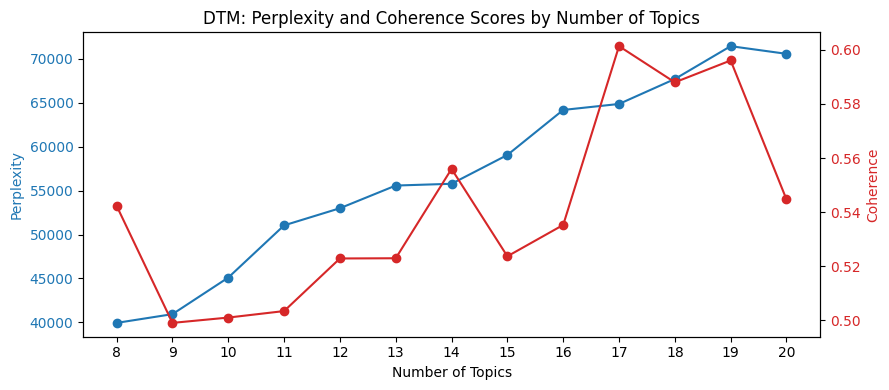

In [ ]:
import os
import numpy as np
import random
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import tomotopy as tp
from tomotopy.coherence import Coherence

# =========================
# ==== 사용자 주요 설정 ====
# =========================

# 폴더 및 파일 경로
MAIN_FOLDER = 'D:\\comfortwoman'
RESULT_FOLDER = os.path.join(MAIN_FOLDER, 'topic_selection_results', 'DTM')
PKL_FILE_PATH = os.path.join(MAIN_FOLDER, 'comfortwoman_Token.pkl')
TIME_RANGES_FILE = os.path.join(RESULT_FOLDER, 'dtm_time_ranges.pkl')

# 토픽 수 범위
TOPIC_RANGE = range(8, 21)

# 학습 반복 횟수 및 worker 수
TRAIN_ITER = 1000   # DTM 학습 반복 횟수
WORKERS = 3         # 병렬 학습에 사용할 worker 수

# 랜덤 시드 (모든 라이브러리 일관성 보장)
RANDOM_SEED = 42

# DTM 파라미터 (None이면 tomotopy 기본값 사용)
ALPHA = None  # Dirichlet prior for document-topic
ETA = None    # Dirichlet prior for topic-word

# 그래프 저장 여부
SAVE_GRAPH = True

# =========================
# ==== 환경 및 시드 고정 ====
# =========================

os.environ["PYTHONHASHSEED"] = str(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

# =========================
# ===== 데이터 로드 ========
# =========================

with open(PKL_FILE_PATH, 'rb') as f:
    df = pickle.load(f)
years = df['Year'].astype(int).tolist()
texts = df['Token'].apply(lambda x: str(x).split() if isinstance(x, float) else x.split()).tolist()

# =========================
# == 시간 구간 불러오기 ====
# =========================

with open(TIME_RANGES_FILE, 'rb') as f:
    time_ranges = pickle.load(f)
print(f"불러온 시간 구간: {time_ranges}")

# 각 문서의 slice 인덱스 매핑 함수
def assign_slice(year, time_ranges):
    for i, (start, end) in enumerate(time_ranges):
        if start <= year <= end:
            return i
    return None

slice_ids = [assign_slice(y, time_ranges) for y in years]

# =========================
# == 토픽수별 평가 반복 ====
# =========================

perplexity_values = []
coherence_values = []
topic_num_list = []

for num_topics in TOPIC_RANGE:
    print(f"\n===== DTM 토픽 수 {num_topics} 처리 시작 =====")
    # DTM 모델 파라미터 고정
    dtm_kwargs = dict(
        k=num_topics,
        t=len(time_ranges),
        seed=RANDOM_SEED
    )
    if ALPHA is not None:
        dtm_kwargs['alpha'] = ALPHA
    if ETA is not None:
        dtm_kwargs['eta'] = ETA

    dtm_model = tp.DTModel(**dtm_kwargs)
    # 문서 추가 (slice별로)
    for tokens, slice_id in zip(texts, slice_ids):
        if slice_id is not None:
            dtm_model.add_doc(tokens, timepoint=slice_id)
    # 학습
    dtm_model.train(TRAIN_ITER, workers=WORKERS, show_progress=True)
    # 퍼플렉시티/코히런스 계산
    perplexity = dtm_model.perplexity
    coh = Coherence(dtm_model, coherence='c_v').get_score()
    perplexity_values.append(perplexity)
    coherence_values.append(coh)
    topic_num_list.append(num_topics)
    print(f"[DTM] Number of Topics: {num_topics}, Perplexity: {perplexity:.2f}, Coherence: {coh:.4f}")
    # 모델 저장 (선택)
    dtm_model.save(os.path.join(RESULT_FOLDER, f'dtm_k{num_topics}_final.bin'))

# =========================
# ===== 결과 저장 ==========
# =========================

results = {
    'topic_range': list(topic_num_list),
    'perplexity': perplexity_values,
    'coherence': coherence_values,
    'time_ranges': time_ranges
}
with open(os.path.join(RESULT_FOLDER, 'dtm_perplexity_coherence.pkl'), 'wb') as f:
    pickle.dump(results, f)
print(f"\nDTM 토픽수별 perplexity/coherence 결과가 {RESULT_FOLDER}에 저장되었습니다.")

# =========================
# ===== 그래프 출력 ========
# =========================

plt.figure(figsize=(9, 4))
ax1 = plt.gca()
color = 'tab:blue'
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Perplexity', color=color)
ax1.plot(topic_num_list, perplexity_values, marker='o', color=color, label='DTM Perplexity')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(list(topic_num_list))

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Coherence', color=color)
ax2.plot(topic_num_list, coherence_values, marker='o', color=color, label='DTM Coherence')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('DTM: Perplexity and Coherence Scores by Number of Topics')
plt.tight_layout()
if SAVE_GRAPH:
    plt.savefig(os.path.join(RESULT_FOLDER, 'dtm_perplexity_coherence.png'))
plt.show()


## (P) DTM 분석

저장경로  
bin 파일         D:\hangang\topic_selection_results\DTM\final_dtm_results
xlsx, png 파일   D:\hangang\DTM_토픽수\

슬라이스별 토픽 키워드 변화 표      dtm_토픽수_slice_keywords.xlsx 
전체 기간 토픽별 대표 키워드        dtm_토픽수_keywords.xlsx 
슬라이스별 토픽 비중               dtm_토픽수_time_distribution.xlsx 
전체 기간 토픽별 대표 문서         dtm_토픽수_representative_docs.xlsx
슬라이스별 토픽별 대표 문서 5개씩   dtm_토픽수_slice_topic_representative_docs.xlsx
토픽 비중 시계열 그래프            dtm_토픽수_topic_trends.png





In [ ]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import tomotopy as tp
from matplotlib import font_manager, rc

# =========================
# ==== 사용자 주요 설정 ====
# =========================

MAIN_FOLDER = 'D:/comfortwoman'
RESULT_FOLDER = os.path.join(MAIN_FOLDER, 'topic_selection_results', 'DTM')
DTM_RESULT_FOLDER = os.path.join(RESULT_FOLDER, 'final_dtm_results')
os.makedirs(DTM_RESULT_FOLDER, exist_ok=True)

TIME_RANGES_FILE = os.path.join(RESULT_FOLDER, 'dtm_time_ranges.pkl')
PKL_FILE_PATH = os.path.join(MAIN_FOLDER, 'comfortwoman_Token.pkl')

RANDOM_SEED = 42
TRAIN_ITER = 500               # DTM 학습 반복 횟수
WORKERS = 4                    # 병렬 학습에 사용할 worker(스레드) 수
TOP_N_KEYWORDS = 10            # 토픽별 상위 키워드 개수
TOP_DOCS_PER_TOPIC_ALL = 10    # 전체 구간(기간) 대표문서 개수 (토픽별)
TOP_DOCS_PER_TOPIC_SLICE = 5   # 슬라이스별 대표문서 개수 (토픽별, 구간별)
# =========================

# Windows 나눔 고딕
font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 음수 깨짐 방지 (필수)
plt.rcParams['axes.unicode_minus'] = False

# ====== 데이터 로드 =======
with open(TIME_RANGES_FILE, 'rb') as f:
    time_ranges = pickle.load(f)
print(f"사용된 시간 구간: {time_ranges}")

with open(PKL_FILE_PATH, 'rb') as f:
    df = pickle.load(f)
years = df['Year'].astype(int).tolist()
texts = df['Token'].apply(lambda x: str(x).split() if isinstance(x, float) else x.split()).tolist()

def assign_slice(year, time_ranges):
    for i, (start, end) in enumerate(time_ranges):
        if start <= year <= end:
            return i
    return None

slice_ids = [assign_slice(y, time_ranges) for y in years]

# == 토픽수 입력 및 결과 폴더 경로 지정 ==
optimal_topics = int(input("최적 토픽 수를 입력하세요: "))

# 엑셀, 그래프 저장 폴더 (D:/comfortwoman/DTM_토픽수)
CUSTOM_RESULT_FOLDER = os.path.join(MAIN_FOLDER, f'DTM_{optimal_topics}')
os.makedirs(CUSTOM_RESULT_FOLDER, exist_ok=True)

# == DTM 모델 ==
dtm_model = tp.DTModel(
    k=optimal_topics,
    t=len(time_ranges),
    seed=RANDOM_SEED
)
for tokens, slice_id in zip(texts, slice_ids):
    if slice_id is not None:
        dtm_model.add_doc(tokens, timepoint=slice_id)
dtm_model.train(TRAIN_ITER, workers=WORKERS, show_progress=True)

# bin 파일(모델)은 기존 폴더에 저장
model_file = os.path.join(DTM_RESULT_FOLDER, f'dtm_k{optimal_topics}_final.bin')
dtm_model.save(model_file)
print(f"DTM 모델 저장 완료: {model_file}")

# == 슬라이스별 토픽 키워드 변화 표 저장 (xlsx는 CUSTOM_RESULT_FOLDER) ==
topic_slice_keywords = []
for topic_id in range(dtm_model.k):
    row = []
    for t_idx, (start, end) in enumerate(time_ranges):
        words = [w for w, _ in dtm_model.get_topic_words(topic_id, t_idx, TOP_N_KEYWORDS)]
        row.append(", ".join(words))
    topic_slice_keywords.append(row)

slice_labels = [f"{start}-{end}" for start, end in time_ranges]
df_keywords = pd.DataFrame(
    topic_slice_keywords,
    columns=slice_labels,
    index=[f"Topic_{i+1}" for i in range(dtm_model.k)]
)
keywords_file = os.path.join(CUSTOM_RESULT_FOLDER, f'dtm_k{optimal_topics}_slice_keywords.xlsx')
df_keywords.to_excel(keywords_file)
print(f"슬라이스별 토픽 키워드 변화 표 저장 완료: {keywords_file}")

# == 전체 토픽별 상위 키워드 (슬라이스별 아님) ==
topic_keywords = []
for k in range(dtm_model.k):
    keywords = [word for word, _ in dtm_model.get_topic_words(k, 0, TOP_N_KEYWORDS)]
    topic_keywords.append(keywords)
keywords_df = pd.DataFrame({
    'Topic': [f"Topic_{i+1}" for i in range(dtm_model.k)],
    'Keywords': [", ".join(kws) for kws in topic_keywords]
})
keywords_file2 = os.path.join(CUSTOM_RESULT_FOLDER, f'dtm_k{optimal_topics}_keywords.xlsx')
keywords_df.to_excel(keywords_file2, index=False)

# == 시간별 토픽 분포 (슬라이스별 문서 평균) ==
time_topic_dist = []
for t_idx in range(len(time_ranges)):
    doc_indices_in_slice = [i for i, s in enumerate(slice_ids) if s == t_idx]
    if not doc_indices_in_slice:
        time_topic_dist.append([0.0] * dtm_model.k)
        continue
    topic_matrix = np.array([dtm_model.docs[i].get_topic_dist() for i in doc_indices_in_slice])
    topic_mean = topic_matrix.mean(axis=0)
    time_topic_dist.append(topic_mean)

time_dist_df = pd.DataFrame(
    time_topic_dist,
    columns=[f"Topic_{i+1}" for i in range(dtm_model.k)],
    index=[f"{start}-{end}" for start, end in time_ranges]
)
time_dist_file = os.path.join(CUSTOM_RESULT_FOLDER, f'dtm_k{optimal_topics}_time_distribution.xlsx')
time_dist_df.to_excel(time_dist_file)

# == 전체 기간 토픽별 대표 문서 추출 ==
doc_topic_dist = []
for doc in dtm_model.docs:
    topic_probs = doc.get_topic_dist()
    doc_topic_dist.append(topic_probs)
rep_docs = {k: [] for k in range(dtm_model.k)}
for doc_idx, doc in enumerate(dtm_model.docs):
    topic_probs = doc.get_topic_dist()
    dominant_topic = np.argmax(topic_probs)
    rep_docs[dominant_topic].append((doc_idx, np.max(topic_probs)))
for k in rep_docs:
    rep_docs[k] = sorted(rep_docs[k], key=lambda x: x[1], reverse=True)[:TOP_DOCS_PER_TOPIC_ALL]
rep_docs_data = []
for topic, docs in rep_docs.items():
    for doc_idx, prob in docs:
        year = years[doc_idx]
        content = df.iloc[doc_idx]['Content'][:100] + "..." if 'Content' in df.columns else ""
        rep_docs_data.append({
            'Topic': f"Topic_{topic+1}",
            'Document_ID': doc_idx,
            'Year': year,
            'Content_Snippet': content,
            'Topic_Probability': prob
        })
rep_docs_df = pd.DataFrame(rep_docs_data)
rep_docs_file = os.path.join(CUSTOM_RESULT_FOLDER, f'dtm_k{optimal_topics}_representative_docs.xlsx')
rep_docs_df.to_excel(rep_docs_file, index=False)

# == 슬라이스별 토픽별 대표 문서 추출 ==
slice_topic_rep_docs = []
for t_idx, (start, end) in enumerate(time_ranges):
    doc_indices_in_slice = [i for i, s in enumerate(slice_ids) if s == t_idx]
    for topic_id in range(dtm_model.k):
        topic_probs = [(i, dtm_model.docs[i].get_topic_dist()[topic_id]) for i in doc_indices_in_slice]
        top_docs = sorted(topic_probs, key=lambda x: x[1], reverse=True)[:TOP_DOCS_PER_TOPIC_SLICE]
        for doc_idx, prob in top_docs:
            year = years[doc_idx]
            content = df.iloc[doc_idx]['Content'][:100] + "..." if 'Content' in df.columns else ""
            slice_topic_rep_docs.append({
                'Time_Slice': f"{start}-{end}",
                'Topic': f"Topic_{topic_id+1}",
                'Document_ID': doc_idx,
                'Year': year,
                'Content_Snippet': content,
                'Topic_Probability': prob
            })
slice_topic_rep_docs_df = pd.DataFrame(slice_topic_rep_docs)
slice_topic_rep_docs_file = os.path.join(CUSTOM_RESULT_FOLDER, f'dtm_k{optimal_topics}_slice_topic_representative_docs.xlsx')
slice_topic_rep_docs_df.to_excel(slice_topic_rep_docs_file, index=False)
print(f"슬라이스별 토픽별 대표문서 표 저장 완료: {slice_topic_rep_docs_file}")

print(f"분석 결과 저장 완료: {CUSTOM_RESULT_FOLDER}")

# == 시각화 (토픽 비중 시계열) ==
plt.figure(figsize=(12, 8))
for topic in range(dtm_model.k):
    proportions = [dist[topic] for dist in time_topic_dist]
    plt.plot(
        [f"{start}-{end}" for start, end in time_ranges],
        proportions,
        label=f"Topic {topic+1}",
        marker='o'
    )
plt.title(f'토픽 비중 시계열 (k={optimal_topics})', fontsize=14)
plt.xlabel('Time Slice', fontsize=12)
plt.ylabel('Topic Proportion', fontsize=12)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(CUSTOM_RESULT_FOLDER, f'dtm_k{optimal_topics}_topic_trends.png'))
plt.close()
print("시각화 파일 저장 완료")


사용된 시간 구간: [(1920, 1945), (1946, 1959), (1960, 1969), (1970, 1979), (1980, 1989), (1990, 1999), (2000, 2009), (2010, 2024)]


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_984\4201482118.py:71: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  dtm_model.train(TRAIN_ITER, workers=WORKERS, show_progress=True)
Iteration: 100%|██████████| 500/500 [12:15<00:00,  1.47s/it, LLPW: -11.097097]


DTM 모델 저장 완료: D:/hangang\topic_selection_results\DTM\final_dtm_results\dtm_k17_final.bin
슬라이스별 토픽 키워드 변화 표 저장 완료: D:/hangang\DTM_17\dtm_k17_slice_keywords.xlsx


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

슬라이스별 토픽별 대표문서 표 저장 완료: D:/hangang\DTM_17\dtm_k17_slice_topic_representative_docs.xlsx
분석 결과 저장 완료: D:/hangang\DTM_17


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_984\4201482118.py:197: UserWarning: Glyph 53664 (\N

시각화 파일 저장 완료
